In this notebook we explore PCA analysis using toy datasets provided by scikit learn. 
It is a continuation of the previous notebook where we defined PCA. 

In [1]:
# Import packages that will be used
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import Generator, PCG64
from sklearn.datasets import load_breast_cancer
rng = Generator(PCG64())
%matplotlib widget

In [2]:
bc = load_breast_cancer()

In [3]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [15]:
X, y = bc.data, bc.target
print(X.shape, y.shape)

(569, 30) (569,)


In [5]:
X = (X - X.mean(axis=0)) / X.std(axis=0)
C = np.cov(X, ddof=1, rowvar=False)

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(C)

In [7]:
ordered = np.argsort(eigenvalues)[::-1] # reverse to have highest to lowest
sorted_eigenvalues = eigenvalues[ordered]
sorted_eigenvectors = eigenvectors[ordered]
print("Eigenvalues:", sorted_eigenvalues)
print("Explained variance:", sorted_eigenvalues / np.sum(sorted_eigenvalues))

Eigenvalues: [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]
Explained variance: [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


In [8]:
explained_var = sorted_eigenvalues / np.sum(sorted_eigenvalues)
explained_var

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

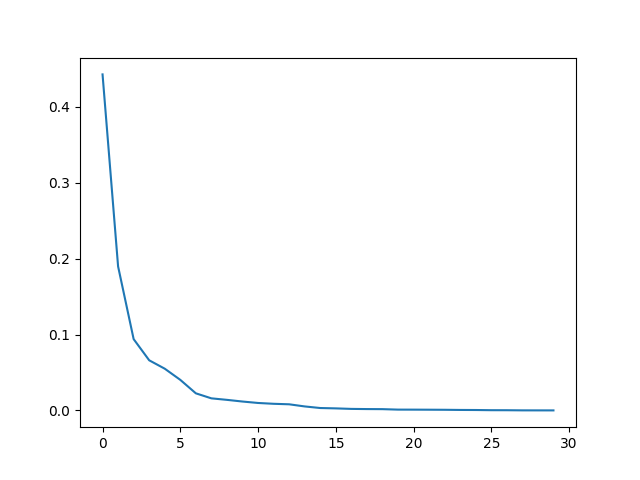

In [11]:
fig, ax = plt.subplots()
ax.plot(explained_var)
plt.show()

(569, 3)


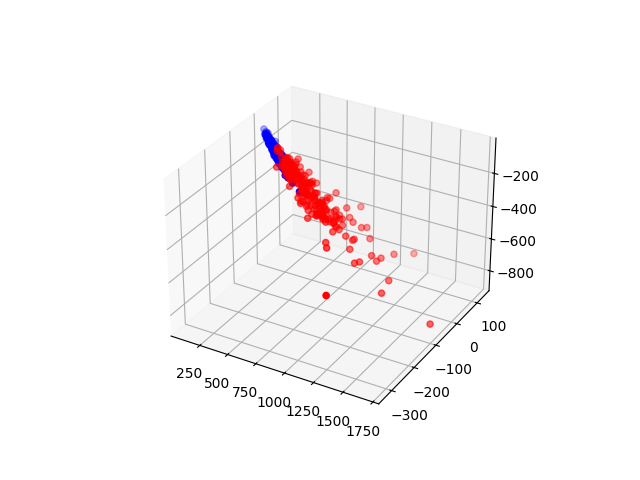

In [21]:
# plot 
k = 3
R = np.matmul(X, sorted_eigenvectors[:, :k])
print(R.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(R[:,0][y==0], R[:,1][y==0], R[:,2][y==0], c='r')
ax.scatter(R[:,0][y==1], R[:,1][y==1], R[:,2][y==1], c='b')
plt.show()

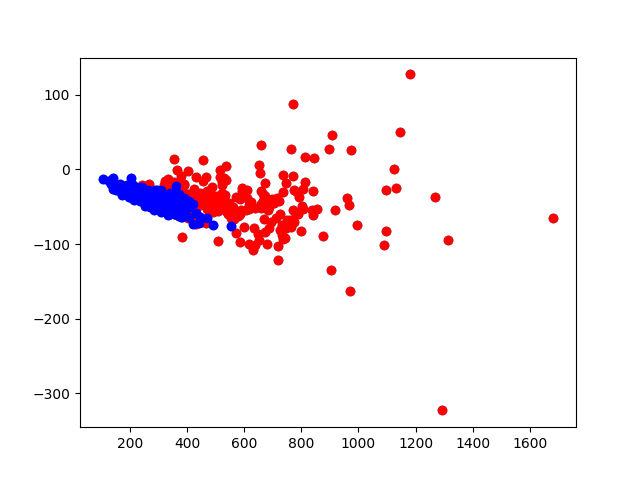

In [20]:
# 5. Dimension reduction
k = 2
R = np.matmul(X, sorted_eigenvectors[:, :k])
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.scatter(R[:,0], R[:,1])
ax.scatter(R[:,0][y==0], R[:,1][y==0], c='r')
ax.scatter(R[:,0][y==1], R[:,1][y==1], c='b')
plt.show()